In [9]:
import rosbag2_py as rb2
import rclpy.serialization
import sensor_msgs
import geometry_msgs
import nav_msgs
from rosidl_runtime_py.utilities import get_message

import matplotlib.pyplot as plt
import numpy as np

import datetime
import time
import math

from typing import List, Tuple

In [2]:
READ_BAG_PATH = "/truck/cumgrain/cumgrain_0.db3"
WRITE_BAG_PATH = "/truck/shitpissman"
INFO_WRITE_BAG_PATH = "/truck/shitpissman" + "/shitpissman_0.db3"

In [3]:
class BagManager:
    class BagMessage:
        def __init__(self, timestamp: int, topic: str, msgtype: str, msg):
            self.stamp = timestamp
            self.topic = topic
            self.msgtype = msgtype
            self.msg = msg

        def serialized(self):
            cockcage = get_message(self.msgtype)

            return rclpy.serialization.serialize_message(self.msg)

    def __init__(self, read_filepath: str = "", write_filepath: str = ""):
        self.cumsocks = rb2.StorageOptions(uri=read_filepath, storage_id='sqlite3')
        self.cockwhirl = rb2.StorageOptions(uri=write_filepath, storage_id='sqlite3')
        self.foreskingliding = rb2.ConverterOptions(input_serialization_format='cdr', output_serialization_format='cdr')

        self.reader = rb2.SequentialReader()
        self.writer = rb2.SequentialWriter()

    def set_read_path(self, filepath: str):
        self.reader = rb2.SequentialReader()
        self.cumsocks = rb2.StorageOptions(uri=filepath, storage_id='sqlite3')

    def set_write_path(self,filepath: str):
        self.writer = rb2.SequentialWriter()
        self.cockwhirl = rb2.StorageOptions(uri=filepath, storage_id='sqlite3')
        self.writer.open(self.cockwhirl, self.foreskingliding)

    def fetch_bag_info(self, filepath: str) -> str:
        urethra = rb2.Info().read_metadata(filepath, 'sqlite3')
        mold = f"{'storage identifier:':<30}{urethra.storage_identifier}\n" +\
            f"{'bag size:':<30}{urethra.bag_size}\n" +\
            f"{'duration':<30}:{urethra.duration}\n" +\
            f"{'starting time':<30}{urethra.starting_time}\n" +\
            f"{'message count:':<30}{urethra.message_count}\n" +\
            f"{'topics:':<30}\n"
        for pissbawlz in urethra.topics_with_message_count:
            mold += f"\t{'name:':<15}{pissbawlz.topic_metadata.name}\n" +\
                f"\t{'type:':<15}{pissbawlz.topic_metadata.type}\n"+\
                f"\t{'msg count:':<15}{pissbawlz.message_count}\n"
        return mold

    def get_timebound_message(self, timestamp: int, topic: str, msgtype: str):
        self.reader.open(self.cumsocks, self.foreskingliding)

        cockcage = get_message(msgtype)

        shartshaft = rb2.StorageFilter(topics=[topic])
        self.reader.set_filter(shartshaft)

        t = -1
        while timestamp > t and self.reader.has_next():
            debug, cummies, t = self.reader.read_next()
            msg = rclpy.serialization.deserialize_message(cummies, cockcage)
        if t < timestamp:
            raise RuntimeError("The timestamp {timestamp} is placed further in time than the last bag record," + \
                f" the timestamp of which is{t}")
        return self.BagMessage(t, topic, msgtype, msg)
    
    def write_message(self, msg: BagMessage):
        self.writer.create_topic(rb2.TopicMetadata(name=msg.topic, type=msg.msgtype, serialization_format='cdr'))
        self.writer.write(msg.topic, msg.serialized(), msg.stamp)

In [4]:
def get_unix_time(year: int, month: int, day: int, hours: int, minutes: int, seconds: int) -> int:
    return time.mktime(datetime.datetime(year, month, day, hours, minutes, seconds).timetuple()) * 1e9

In [5]:
cumbowl = BagManager(READ_BAG_PATH)

homosexualintercourse = cumbowl.fetch_bag_info(READ_BAG_PATH)
print(homosexualintercourse)

storage identifier:           sqlite3
bag size:                     64880640
duration                      :0:05:07.556573
starting time                 2022-09-01 18:33:12.696820
message count:                52281
topics:                       
	name:          /camera/imu
	type:          sensor_msgs/msg/Imu
	msg count:     36879
	name:          /control/twist
	type:          geometry_msgs/msg/TwistStamped
	msg count:     9868
	name:          /lidar/scan
	type:          sensor_msgs/msg/LaserScan
	msg count:     1844
	name:          /odom
	type:          nav_msgs/msg/Odometry
	msg count:     1845
	name:          /tf
	type:          tf2_msgs/msg/TFMessage
	msg count:     1845



[INFO:1679088763.486648731] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.


In [6]:
niggers = [get_unix_time(2022, 9, 1, 18, 33, 50), get_unix_time(2022, 9, 1, 18, 33, 54),\
    get_unix_time(2022, 9, 1, 18, 33, 58), get_unix_time(2022, 9, 1, 18, 34, 2)]

In [7]:
syphilis = []
joebiden = []

for nig in niggers:
    shit = cumbowl.get_timebound_message(nig, "/lidar/scan", "sensor_msgs/msg/LaserScan")
    piss = cumbowl.get_timebound_message(nig, "/odom", "nav_msgs/msg/Odometry")

    syphilis.append(shit)
    joebiden.append(piss)

    print(f"scan timestamp: {shit.stamp}; odom timestamp: {piss.stamp}")

[INFO:1679088765.185731904] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.
[INFO:1679088766.165185349] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.


scan timestamp: 1662057230148206206; odom timestamp: 1662057230086741345


[INFO:1679088767.065667457] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.
[INFO:1679088767.695531459] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.


scan timestamp: 1662057234096594849; odom timestamp: 1662057234035861738


[INFO:1679088768.286935051] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.
[INFO:1679088768.768612838] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.


scan timestamp: 1662057238075677945; odom timestamp: 1662057238160013128


[INFO:1679088769.321021839] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.
[INFO:1679088769.791781974] Opened database '/truck/cumgrain/cumgrain_0.db3' for READ_ONLY.


scan timestamp: 1662057242096740188; odom timestamp: 1662057242007636199


In [11]:
#stolen from dasimagin
def scan2cloud(scan):
    points = []
    angle = 0
    angles = np.arange(scan.angle_min, scan.angle_max, scan.angle_increment)
    for distance, angle in zip(scan.ranges, angles) :
        if not math.isfinite(distance):
            continue
        x = distance * np.cos(angle)
        y = distance * np.sin(angle)
        points.append([x, y])
    return np.array(points)

def quaternion2euler(quat: geometry_msgs.msg.Quaternion) -> List[float]:
    angles = []
    
    sinr_cosp = 2 * (quat.w * quat.x + quat.y * quat.z)
    cosrr_cosp = 2 * (quat.w * quat.x + quat.y * quat.z)
    roll = math.atan2(sinr_cosp, cosr_cosp)

    sinr_cosp = 2 * (quat.w * quat.x + quat.y * quat.z)
    cosr_cosp = 1 - 2 * (quat.x * quat.x + quat.y * quat.y)

    sinp = math.sqrt(1 + 2 * (quat.w * quat.y - quat.x * quat.z))
    cosp = math.sqrt(1 - 2 * (quat.w * quat.y - quat.x * quat.z))
    pitch = 2 * math.atan2(sinp, cosp) - pi / 2

    siny_cosp = 2 * (quat.w * quat.z + quat.x * quat.y)
    cosy_cosp = 1 - 2 * (quat.y * quat.y + quat.z * quat.z)
    yaw = math.atan2(siny_cosp, cosy_cosp);

    return [roll, pitch, yaw]

#defined according to the Rawseeds Project
def calculate_rpe(slam_odom: List[BagManager.BagMessage], gt_odom: List[BagManager.BagMessage]) -> (float, float):
    tsum = 0
    rsum = 0
    n = len(slam_odom)
    for i in range(n):
        tsum += (slam_odom[i].pose.pose.posiiton.x - gt_odom[i].pose.pose.posiiton.x) ** 2 + (slam_odom[i].pose.pose.posiiton.x - gt_odom[i].pose.pose.posiiton.x) ** 2
        rsum += (quaternion2euler(gt_odom.pose.pose.quaternion)[2] - quaternion2euler(slam_odom.pose.pose.quaternion)[2]) ** 2
    
    return tsum / n, rsum / n

def visualize_odom(scan: List[BagManager.BagMessage], odom: List[BagManager.BagMessage]):
    shartniggabawlz, ax = plt.subplots(figsize=(16, 16))
    limit = 15 
    plt.xlim(-limit, +limit)
    plt.ylim(-limit, +limit)

    cmap = plt.get_cmap('plasma')

    for i in range(len(scan)):
        points = scan2cloud(scan[i].msg)
        ax.scatter(points[:, 0], points[:, 1], s=2, alpha=0.3, color=cmap(i/len(scan)))
        ax.plot(odom[i].msg.pose.pose.position.x, odom[i].msg.pose.pose.position.y, marker="o", color=cmap(i/len(scan)), markeredgecolor="magenta")
        ax.plot([], [], 'o', color=cmap(i/len(scan)), label=f"scan {i}")

        ax.set_title(f"Scan and odometry data visualization")

        ax.xaxis.set_ticks(np.arange(-limit, +limit, 2.0))
        ax.yaxis.set_ticks(np.arange(-limit, +limit, 2.0))
        ax.xaxis.set_ticks(np.arange(-limit, +limit, 0.5), minor=True)
        ax.yaxis.set_ticks(np.arange(-limit, +limit, 0.5), minor=True)

        ax.annotate(f"{odom[i].msg.pose.pose.position.x}, {odom[i].msg.pose.pose.position.y}", (odom[i].msg.pose.pose.position.x, odom[i].msg.pose.pose.position.y))
        ax.grid(which='major', axis='both', linewidth=1)
        ax.grid(which='minor', axis='both', linewidth=1, linestyle=':')
        ax.legend()

def visualize_odom_evaluation(scan: List[BagManager.BagMessage], slam_odom: List[BagManager.BagMessage], gt_odom: List[BagManager.BagMessage]):
    shartniggabawlz, ax = plt.subplots(figsize=(16, 16))
    limit = 15 
    plt.xlim(-limit, +limit)
    plt.ylim(-limit, +limit)

    precum = ax.legend(loc="upper right")
    cum = ax.legend(loc="lower right")
    ax.add_artist(precum)
    ax.add_artist(cum)

    cmap = plt.get_cmap('plasma')

    for i in range(len(scan)):
        points = scan2cloud(scan[i].msg)
        ax.scatter(points[:, 0], points[:, 1], s=2, alpha=0.3, color=cmap(i/len(scan)), label=f"scan {i}")

        ax.plot(gt_odom[i].msg.pose.pose.position.x, gt_odom[i].msg.pose.pose.position.y, marker="o", color=cmap(i/len(scan)), markeredgecolor="brown")
        ax.annotate(f"{gt_odom[i].msg.pose.pose.position.x}, {gt_odom[i].msg.pose.pose.position.y}", (gt_odom[i].msg.pose.pose.position.x, gt_odom[i].msg.pose.pose.position.y))

        ax.plot(slam_odom[i].msg.pose.pose.position.x, slam_odom[i].msg.pose.pose.position.y, marker="o", color=cmap(i/len(scan)), markeredgecolor="magenta")
        ax.annotate(f"{odom[i].msg.pose.pose.position.x}, {odom[i].msg.pose.pose.position.y}", (odom[i].msg.pose.pose.position.x, odom[i].msg.pose.pose.position.y))

        precum.set_label(f"scan {i}")

    ax.plot([], [], 'o', color='brown', label='Ground truth pose')
    ax.plot([], [], 'o', color='magenta', label='Estimated pose')
    precum.set_label(f"Ground truth pose")
    precum.set_label(f"Estimated pose")

    rpe = calculate_rpe(slam_odom, gt_odom)
    ax.plot([], [], label=f'T-RPE: {rpe[0]}')
    ax.plot([], [], label=f'R-RPE: {rpe[1]}')
    cum.set_label(f'T-RPE: {rpe[0]}')
    cum.set_label(f'R-RPE: {rpe[1]}')

    ax.xaxis.set_ticks(np.arange(-limit, +limit, 2.0))
    ax.yaxis.set_ticks(np.arange(-limit, +limit, 2.0))
    ax.xaxis.set_ticks(np.arange(-limit, +limit, 0.5), minor=True)
    ax.yaxis.set_ticks(np.arange(-limit, +limit, 0.5), minor=True)

    ax.grid(which='major', axis='both', linewidth=1)
    ax.grid(which='minor', axis='both', linewidth=1, linestyle=':')

    ax.set_title(f"Localization evaluation visualization")

def evaluate_odom(slam_odom: List[BagManager.BagMessage], gt_odom: List[BagManager.BagMessage]):
    mold = ""
    n = len(slam_odom)

    for i in range(n): 
        gt_pose = gt_odom[i].pose.pose.position
        slam_pose = slam_odom[i].pose.pose.position
        gt_rot = quaternion2euler(gt_odom[i].pose.pose.quaternion)
        slam_rot = quaternion2euler(slam_odom[i].pose.pose.quaternion)
        gt_lin = gt_odom[i].twist.twist.linear
        slam_lin = slam_odom[i].twist.twist.linear
        gt_ang = gt_odom[i].twist.twist.angular
        slam_ang = slam_odom[i].twist.twist.angular
        trpe, rrpe = calculate_rpe([slam_odom[i]], [gt_odom[i]])

        mold += f"{f'pair #{i}':<30}\n" +\
                f"{'GT msg timestamp:':<30:>15}{gt_odom[i]}\n" +\
                f"{'SLAM msg timestamp':<30:>15}:{urethra.duration}\n" +\
                f"{'GT position:':<30:>30}{gt_pose.x} {gt_pose.y} {gt_pose.z}\n" +\
                f"{'SLAM position:':<30:>30}{slam_pose.x} {slam_pose.y} {slam_pose.z}\n" +\
                f"{'GT rotation:':<30:>30}{gt_rot.roll} {gt_rot.pitch} {gt_rot.yaw}\n" +\
                f"{'SLAM rotation:':<30:>30}{slam_rot.roll} {slam_rot.pitch} {slam_rot.yaw}\n" +\
                f"{'GT linear velocity:':<30:>30}{gt_lin.x} {gt_lin.y} {gt_lin.z}\n" +\
                f"{'SLAM linear velocity:':<30:>30}{slam_lin.x} {slam_lin.y} {slam_lin.z}\n" +\
                f"{'GT angular velocity:':<30:>30}{gt_ang.x} {gt_ang.y} {gt_ang.z}\n" +\
                f"{'SLAM angular velocity:':<30:>30}{slam_ang.x} {slam_ang.y} {slam_ang.z}\n" +\
                f"{'T-RPE pair score:':<30:>15}{trpe}\n" +\
                f"{'R-RPE pair score:':<30:>15}{rrpe}\n"
    
    trpe, rrpe = calculate_rpe(slam_odom, gt_odom)
    mold += f"{'T-RPE score:':<30}{trpe}\n" +\
            f"{'R-RPE score:':<30:>15}{rrpe}"
    return mold

/truck/packages/laser_scan_matcher/.venv/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/truck/packages/laser_scan_matcher/.venv/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


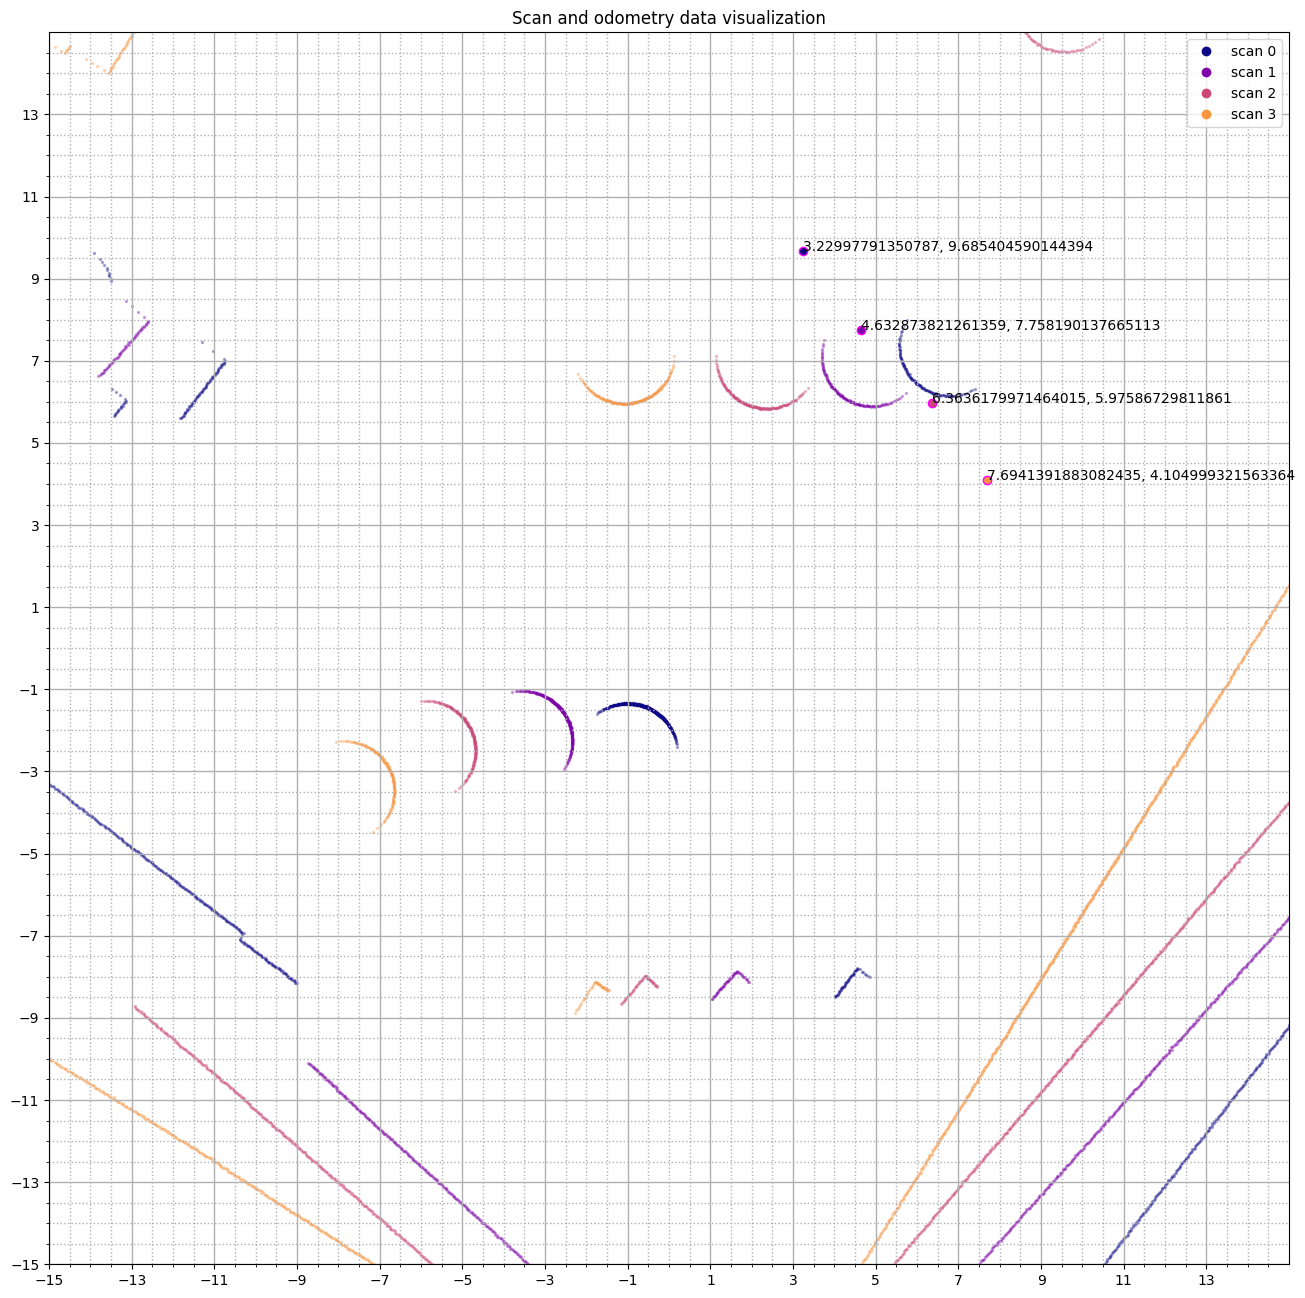

In [12]:
visualize_odom(syphilis, joebiden)

In [13]:
cumbowl.set_write_path(WRITE_BAG_PATH)

for x, y in zip(syphilis, joebiden):
    cumbowl.write_message(x)
    cumbowl.write_message(y)

print(cumbowl.fetch_bag_info(INFO_WRITE_BAG_PATH))

storage identifier:           sqlite3
bag size:                     122880
duration                      :0:00:12.009998
starting time                 2022-09-01 18:33:50.086741
message count:                8
topics:                       
	name:          /lidar/scan
	type:          sensor_msgs/msg/LaserScan
	msg count:     4
	name:          /odom
	type:          nav_msgs/msg/Odometry
	msg count:     4



[INFO:1679089114.712578201] Opened database '/truck/shitpissman/shitpissman_0.db3' for READ_WRITE.
[INFO:1679089114.740646457] Opened database '/truck/shitpissman/shitpissman_0.db3' for READ_ONLY.
